# Predicting Enron Spam Emails using Supervised Learning

## DS-GA 1001: Introduction to Data Science Final Project

### Scripts

## Exploratory Data Analysis

Created On: 11/25/2020

Modified On: 12/03/2020

### Description

This script applies exploratory data analysis (EDA) to the `emails_cleaned.csv` dataset. 

In [1]:
import pandas as pd
import numpy as np
import itertools
import collections
import nltk
nltk.download('averaged_perceptron_tagger')
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer

print('SUCCESS! All modules have been imported.')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Tong\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


SUCCESS! All modules have been imported.


In [2]:
df_emails = pd.read_csv('../data/emails.csv')
df = pd.read_csv('../data/emails_cleaned.csv')

### Analyze Text Statistics

#### Word Counts

In this part, we analyzed the original `emails.csv` dataset. We first counted the length of words in each email instance. 

**The minimum length is 1 word. The maximum length is 43,621 words.**

**The average word length is 60 words. The standard deviation is 133.06.**

In [3]:
email_length_counts = df_emails.X.str.len()
mean_email_length = email_length_counts.mean()
std_email_length = email_length_counts.std()
email_length_counts.describe()

count    829141.000000
mean         60.054999
std         133.061498
min           1.000000
25%          21.000000
50%          47.000000
75%          72.000000
max       43621.000000
Name: X, dtype: float64

#### Word Length Visualization

We then visualized the distribution of email lengths by creating a histogram. 

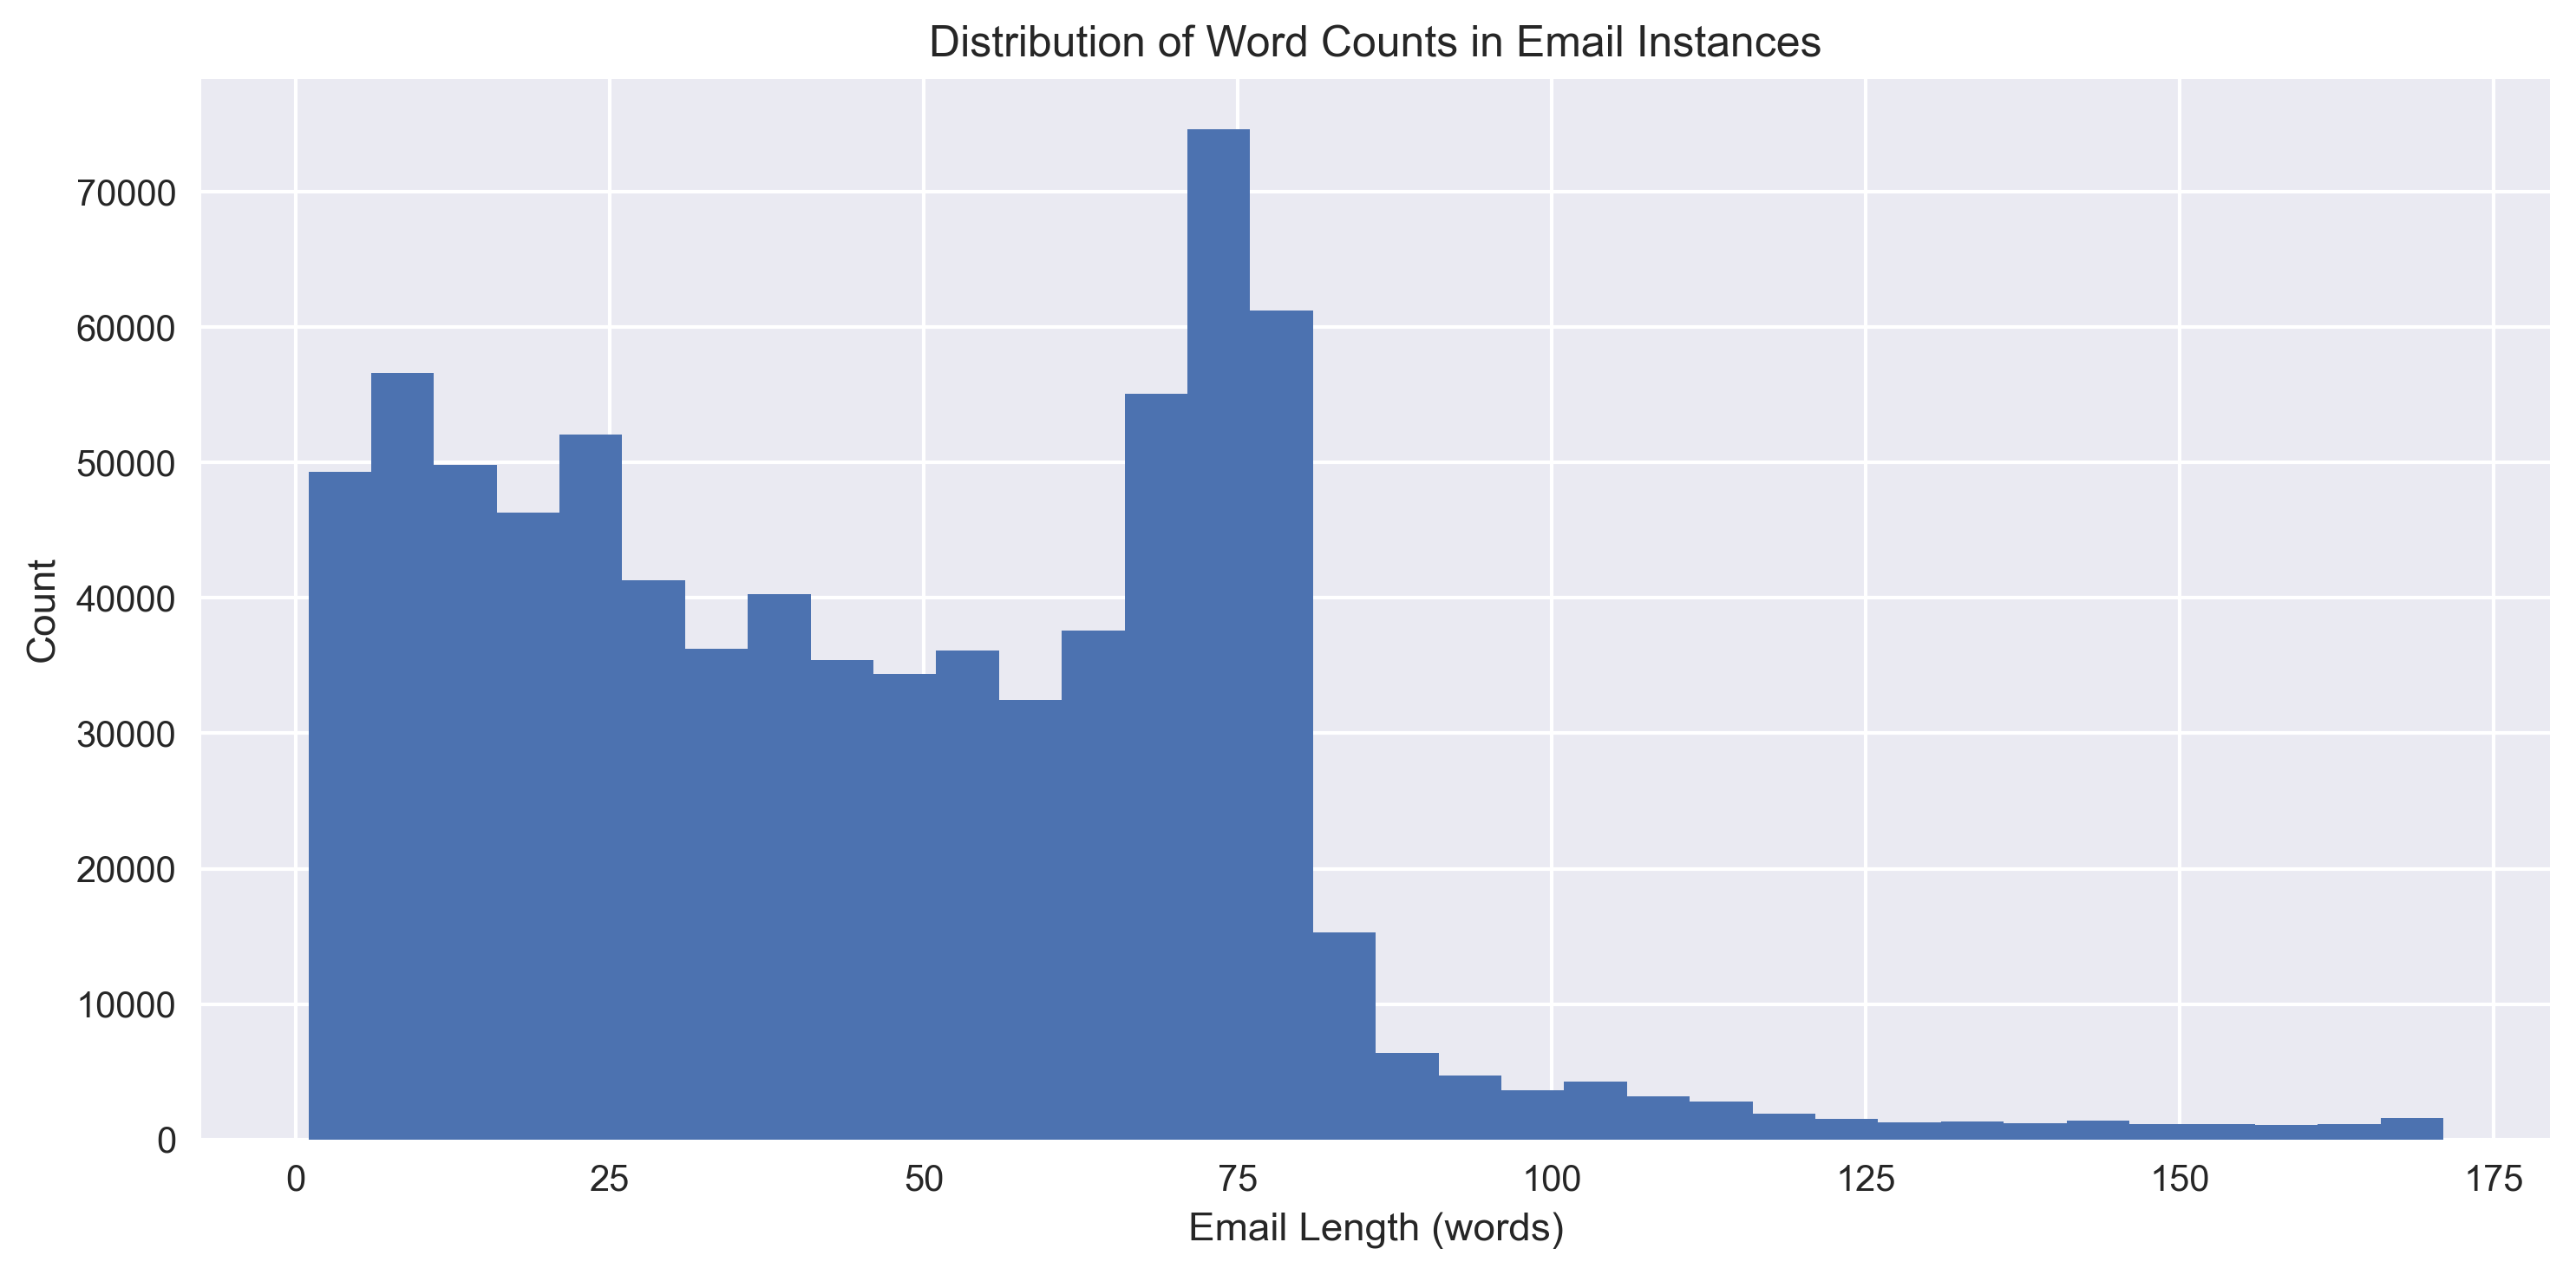

In [4]:
range_min = 1
range_max = 60 + 113

# Plot the average word length in each email instance
plt.style.use('seaborn')
fig = plt.figure(num=None, figsize=(10, 5), dpi=300, tight_layout=True)
plt.hist(email_length_counts, bins=range(range_min, range_max, 5))
plt.xlabel('Email Length (words)')
plt.ylabel('Count')
plt.title('Distribution of Word Counts in Email Instances')
plt.show()
fig.savefig('../results/distribution_of_word_counts_in_email_instances.png', dpi=fig.dpi)

### Missing Values

In data processing section, we checked whether there are missing values in our cleaned dateset. As a result, there were 43,469 rows (5.24\%) containing missing values. Since it was a relatively small portion, we dropped all rows with missing values. 

### Dimensions

The cleaned email dataset has 2 columns and 785,741 rows.

In [5]:
df.shape

(785648, 2)

### Head and Tail

Below are the first and last 5 rows of record.

In [6]:
display(df.head())
display(df.tail())

,X,y
0,aa,0
1,aa,0
2,aa,0
3,aa,0
4,aa,0


,X,y
785643,zzw afeet com,1
785644,zzzz,1
785645,zzzz example com,1
785646,zzzz hello,1
785647,zzzz web site making money pm,1


### Word Frequencies

##### Top 15 most frequently words

In this part, we counted the frequency of each word in our dataset. We sorted them in descending order. Below is a summary table showing the top 15 most frequently used words.

In [7]:
df['X'] = df['X'].astype(str)
token = [word.lower().split() for word in df['X']]
token_extract = list(itertools.chain(*token))
token_count = collections.Counter(token_extract)

In [8]:
clean_token = pd.DataFrame(token_count.most_common(15), columns=['words', 'count'])

In [9]:
clean_token.to_csv('../results/top_15_most_frequently_used_words.csv', index=False)

In [10]:
display(clean_token)

,words,count
0,com,23968
1,company,22911
2,please,19974
3,would,15394
4,new,15140
5,may,13050
6,information,12985
7,time,12267
8,business,12108
9,said,11866


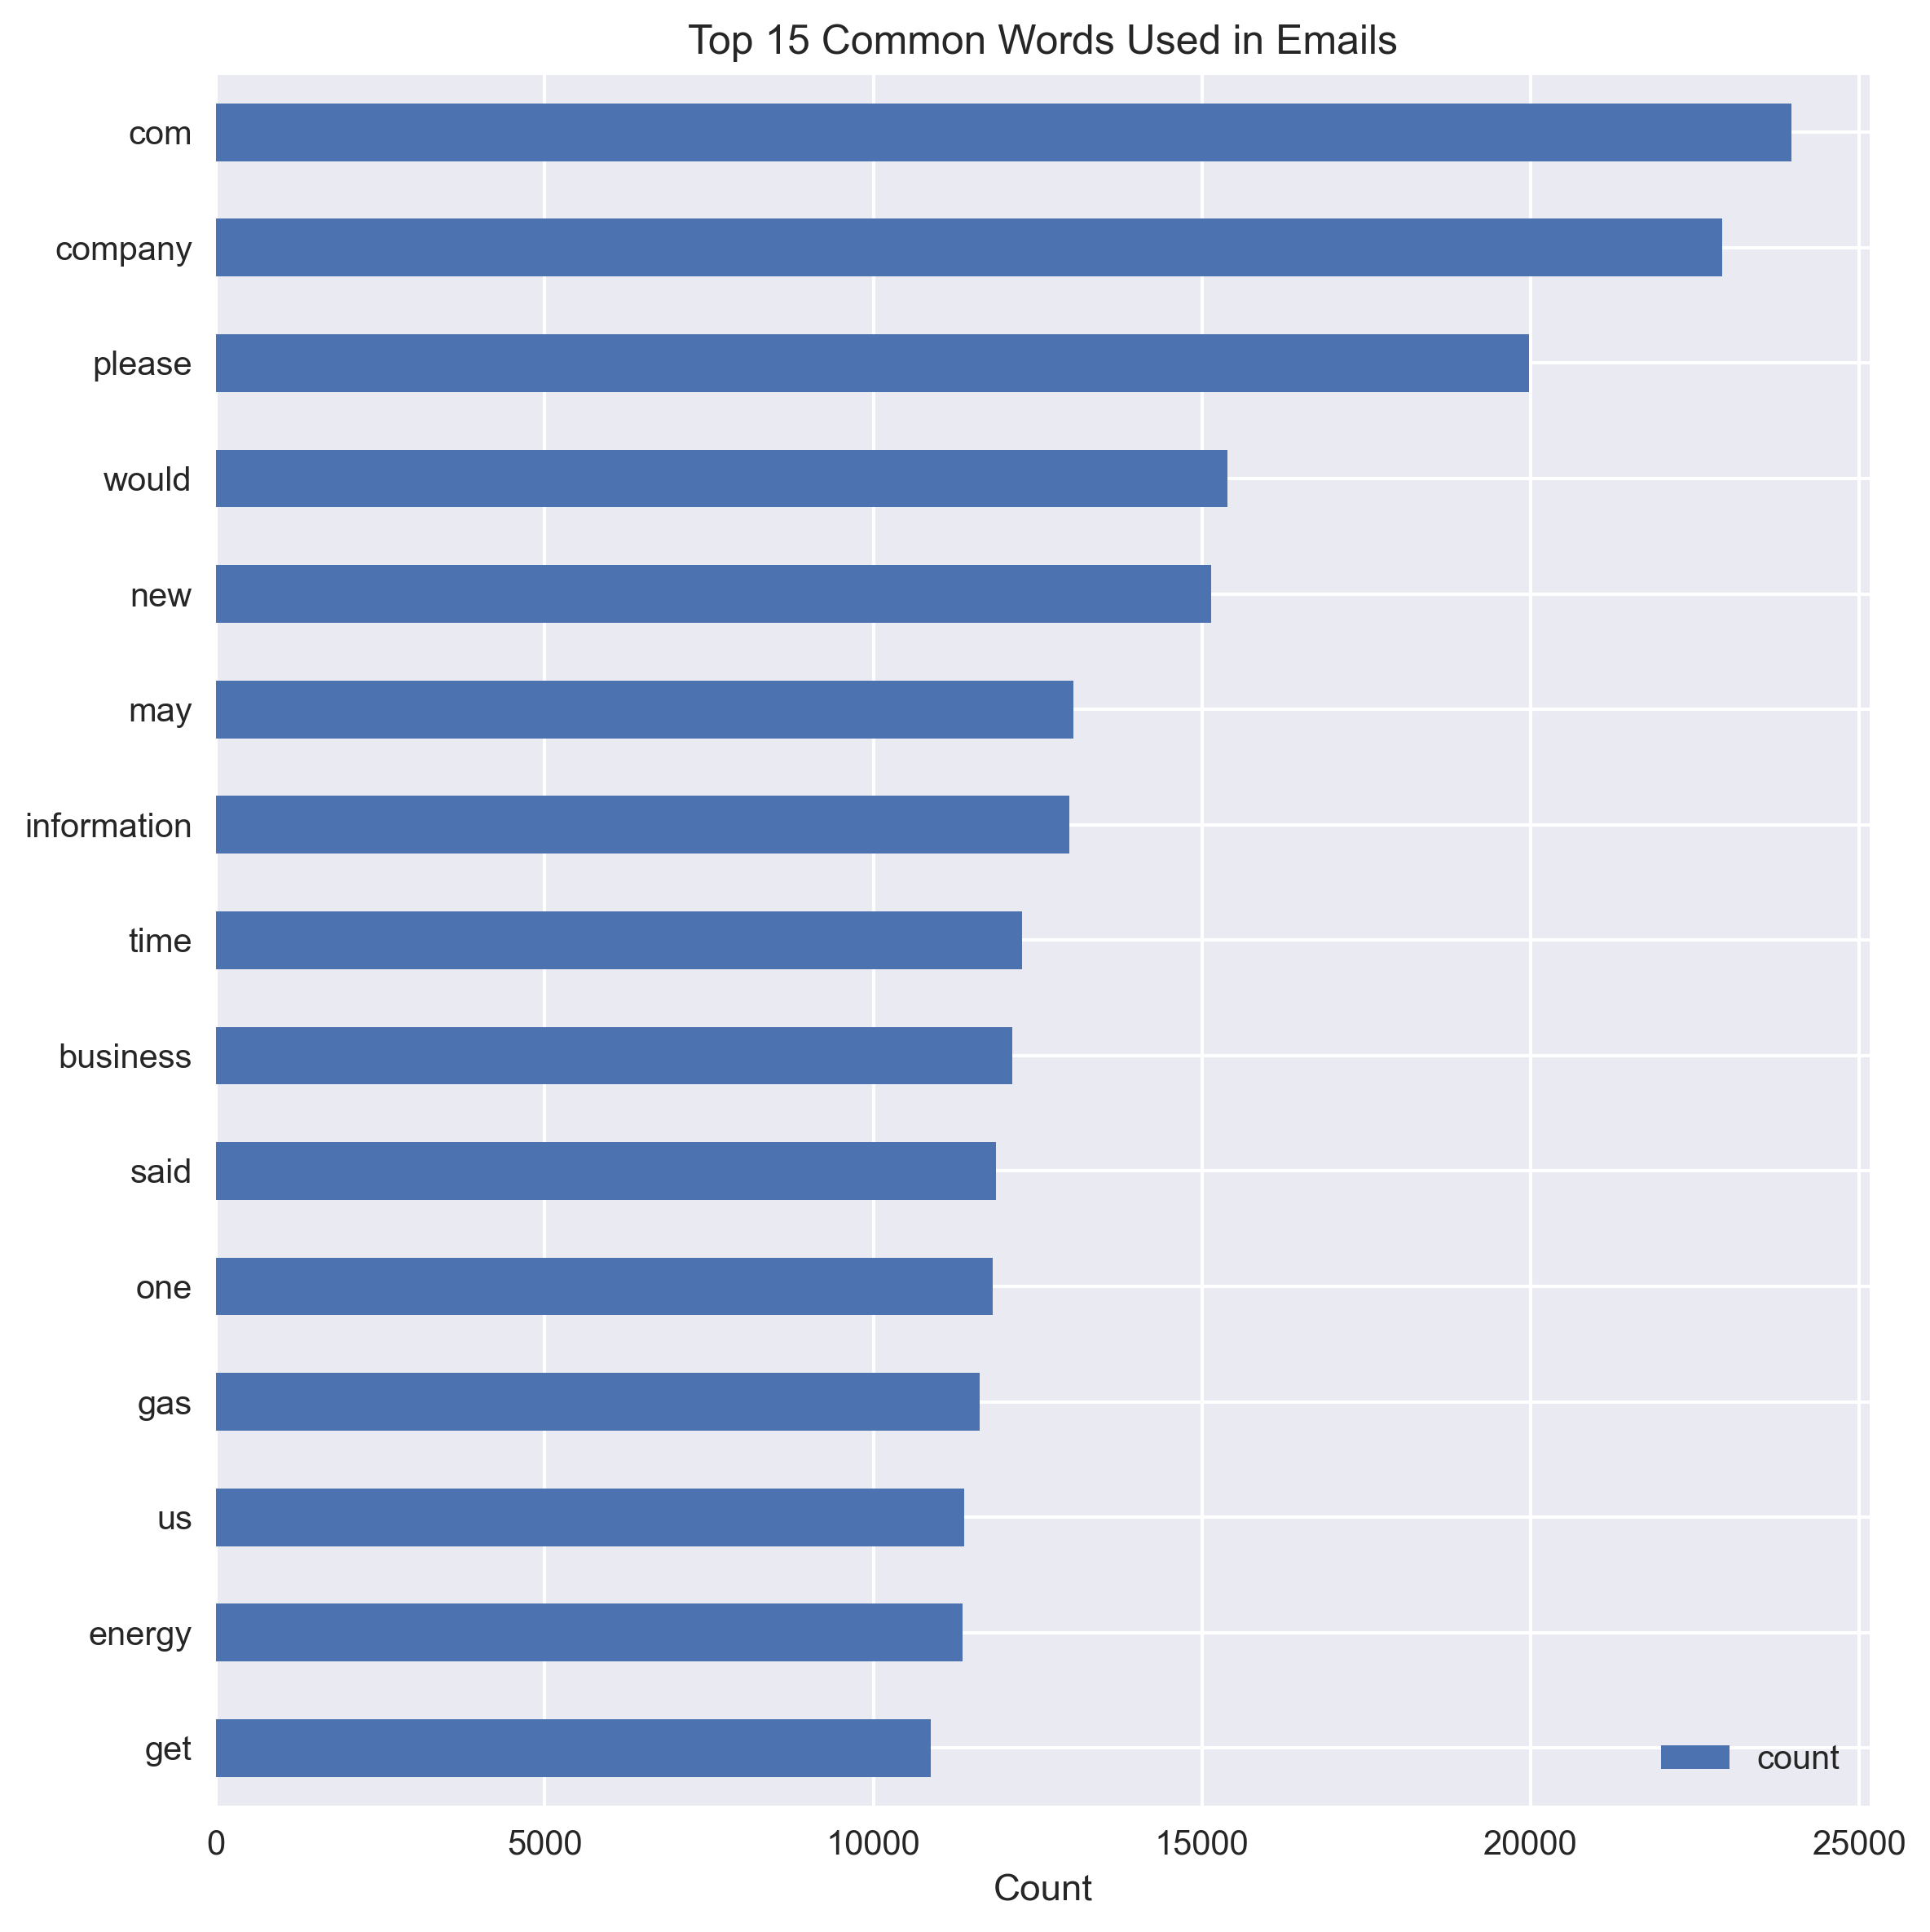

In [11]:
# Visualize top 15 most frequently used words
fig, ax = plt.subplots(figsize=(8, 8), dpi=300, tight_layout=True)
clean_token.sort_values(by='count').plot.barh(x='words', y='count', ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('')
ax.set_title("Top 15 Common Words Used in Emails")
plt.show()
fig.savefig('../results/top_15_common_words_used_in_emails.png', dpi=fig.dpi)

##### Top 15 most frequently adjectives and adverbs

In this part, we counted the frequency of each adjectives and adverbs in our dataset. We sorted them in descending order. Below is a summary table showing the top 15 most frequently used adjectives and adverbs.

In [12]:
pos_tags = nltk.pos_tag(token_extract)

adj = []
adv = []

for word, pos in pos_tags:
    if (pos in "JJ"):
        adj.append(word)
    if (pos in "WRB"):
        adv.append(word)

adj_count = collections.Counter(adj)
clean_adj = pd.DataFrame(adj_count.most_common(15), columns=['words', 'count'])
adv_count = collections.Counter(adv)
clean_adv = pd.DataFrame(adv_count.most_common(15), columns=['words', 'count'])

In [13]:
display(clean_adj)
display(clean_adv)

,words,count
0,new,15140
1,financial,6116
2,free,6036
3,last,5742
4,next,4942
5,original,4926
6,many,4716
7,available,4329
8,u,4225
9,good,4009


,words,count
0,also,9143
1,forward,5228
2,well,4505
3,back,3782
4,even,3243
5,still,3125
6,however,2450
7,currently,2398
8,already,2284
9,first,2220


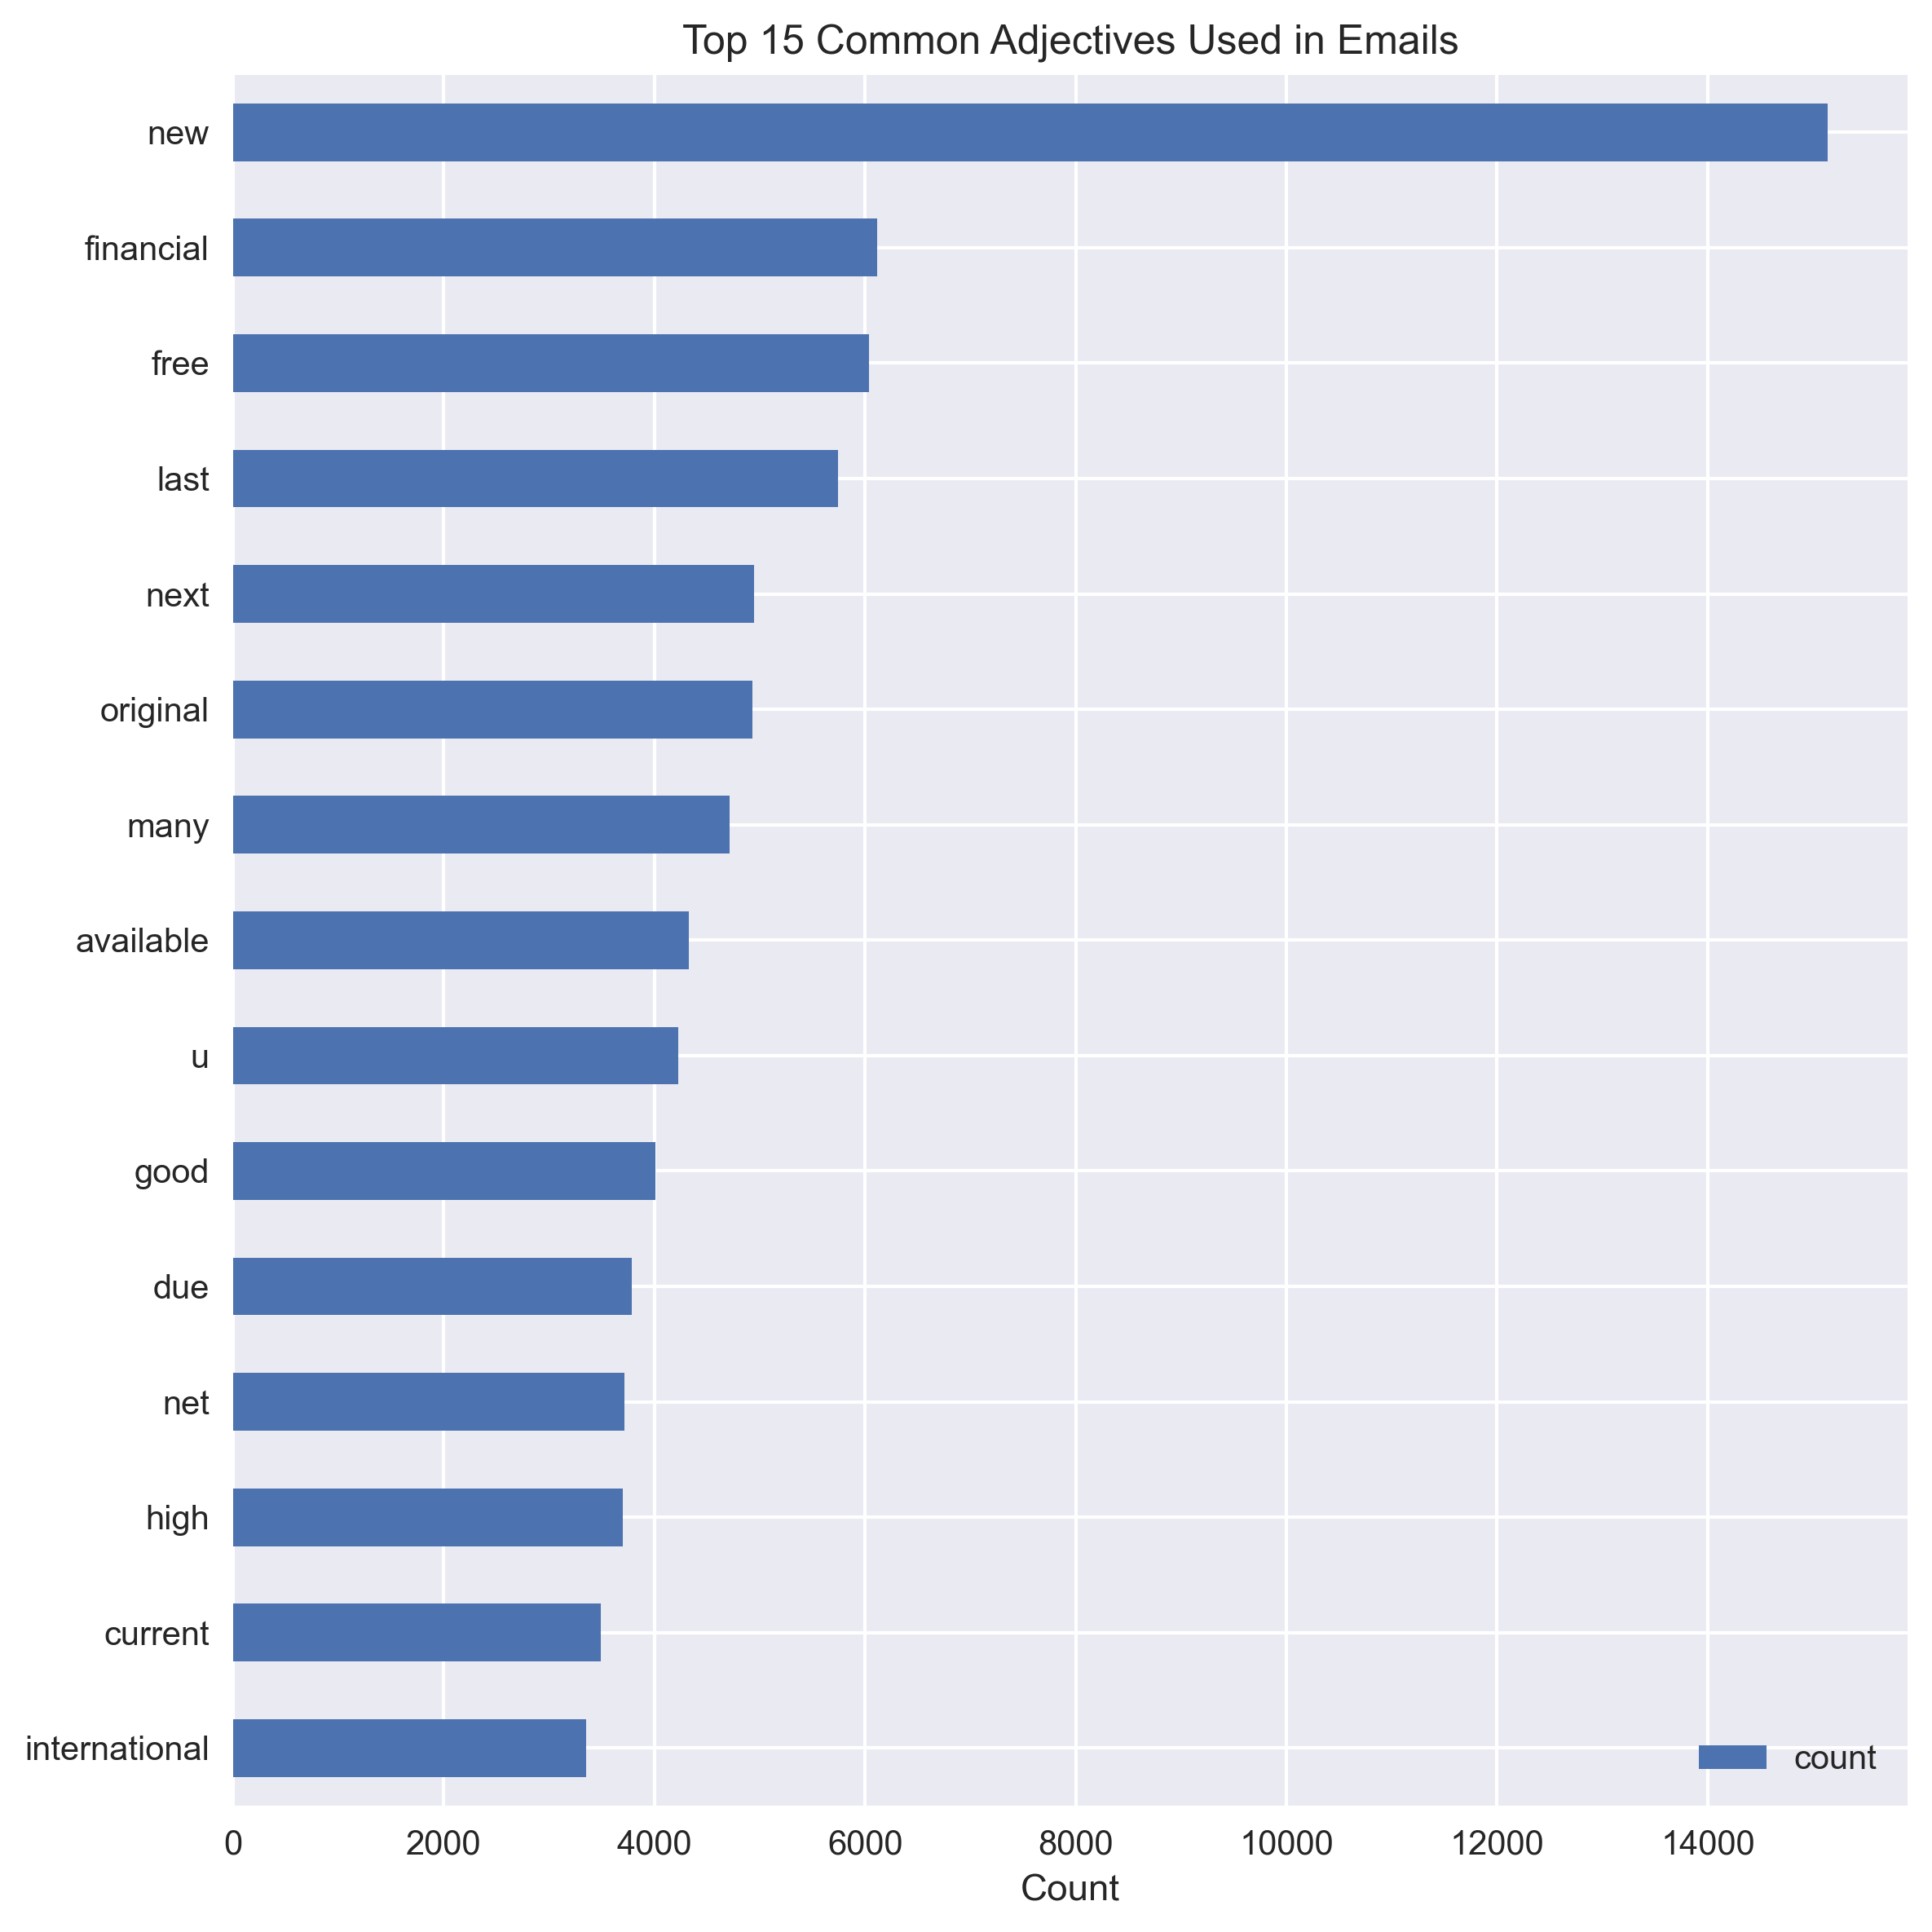

In [14]:
# Visualize top 15 most frequently used adjectives
fig, ax = plt.subplots(figsize=(8, 8), dpi=300, tight_layout=True)
clean_adj.sort_values(by='count').plot.barh(x='words', y='count', ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('')
ax.set_title("Top 15 Common Adjectives Used in Emails")
plt.show()
fig.savefig('../results/top_15_common_adjectives_used_in_emails.png', dpi=fig.dpi)

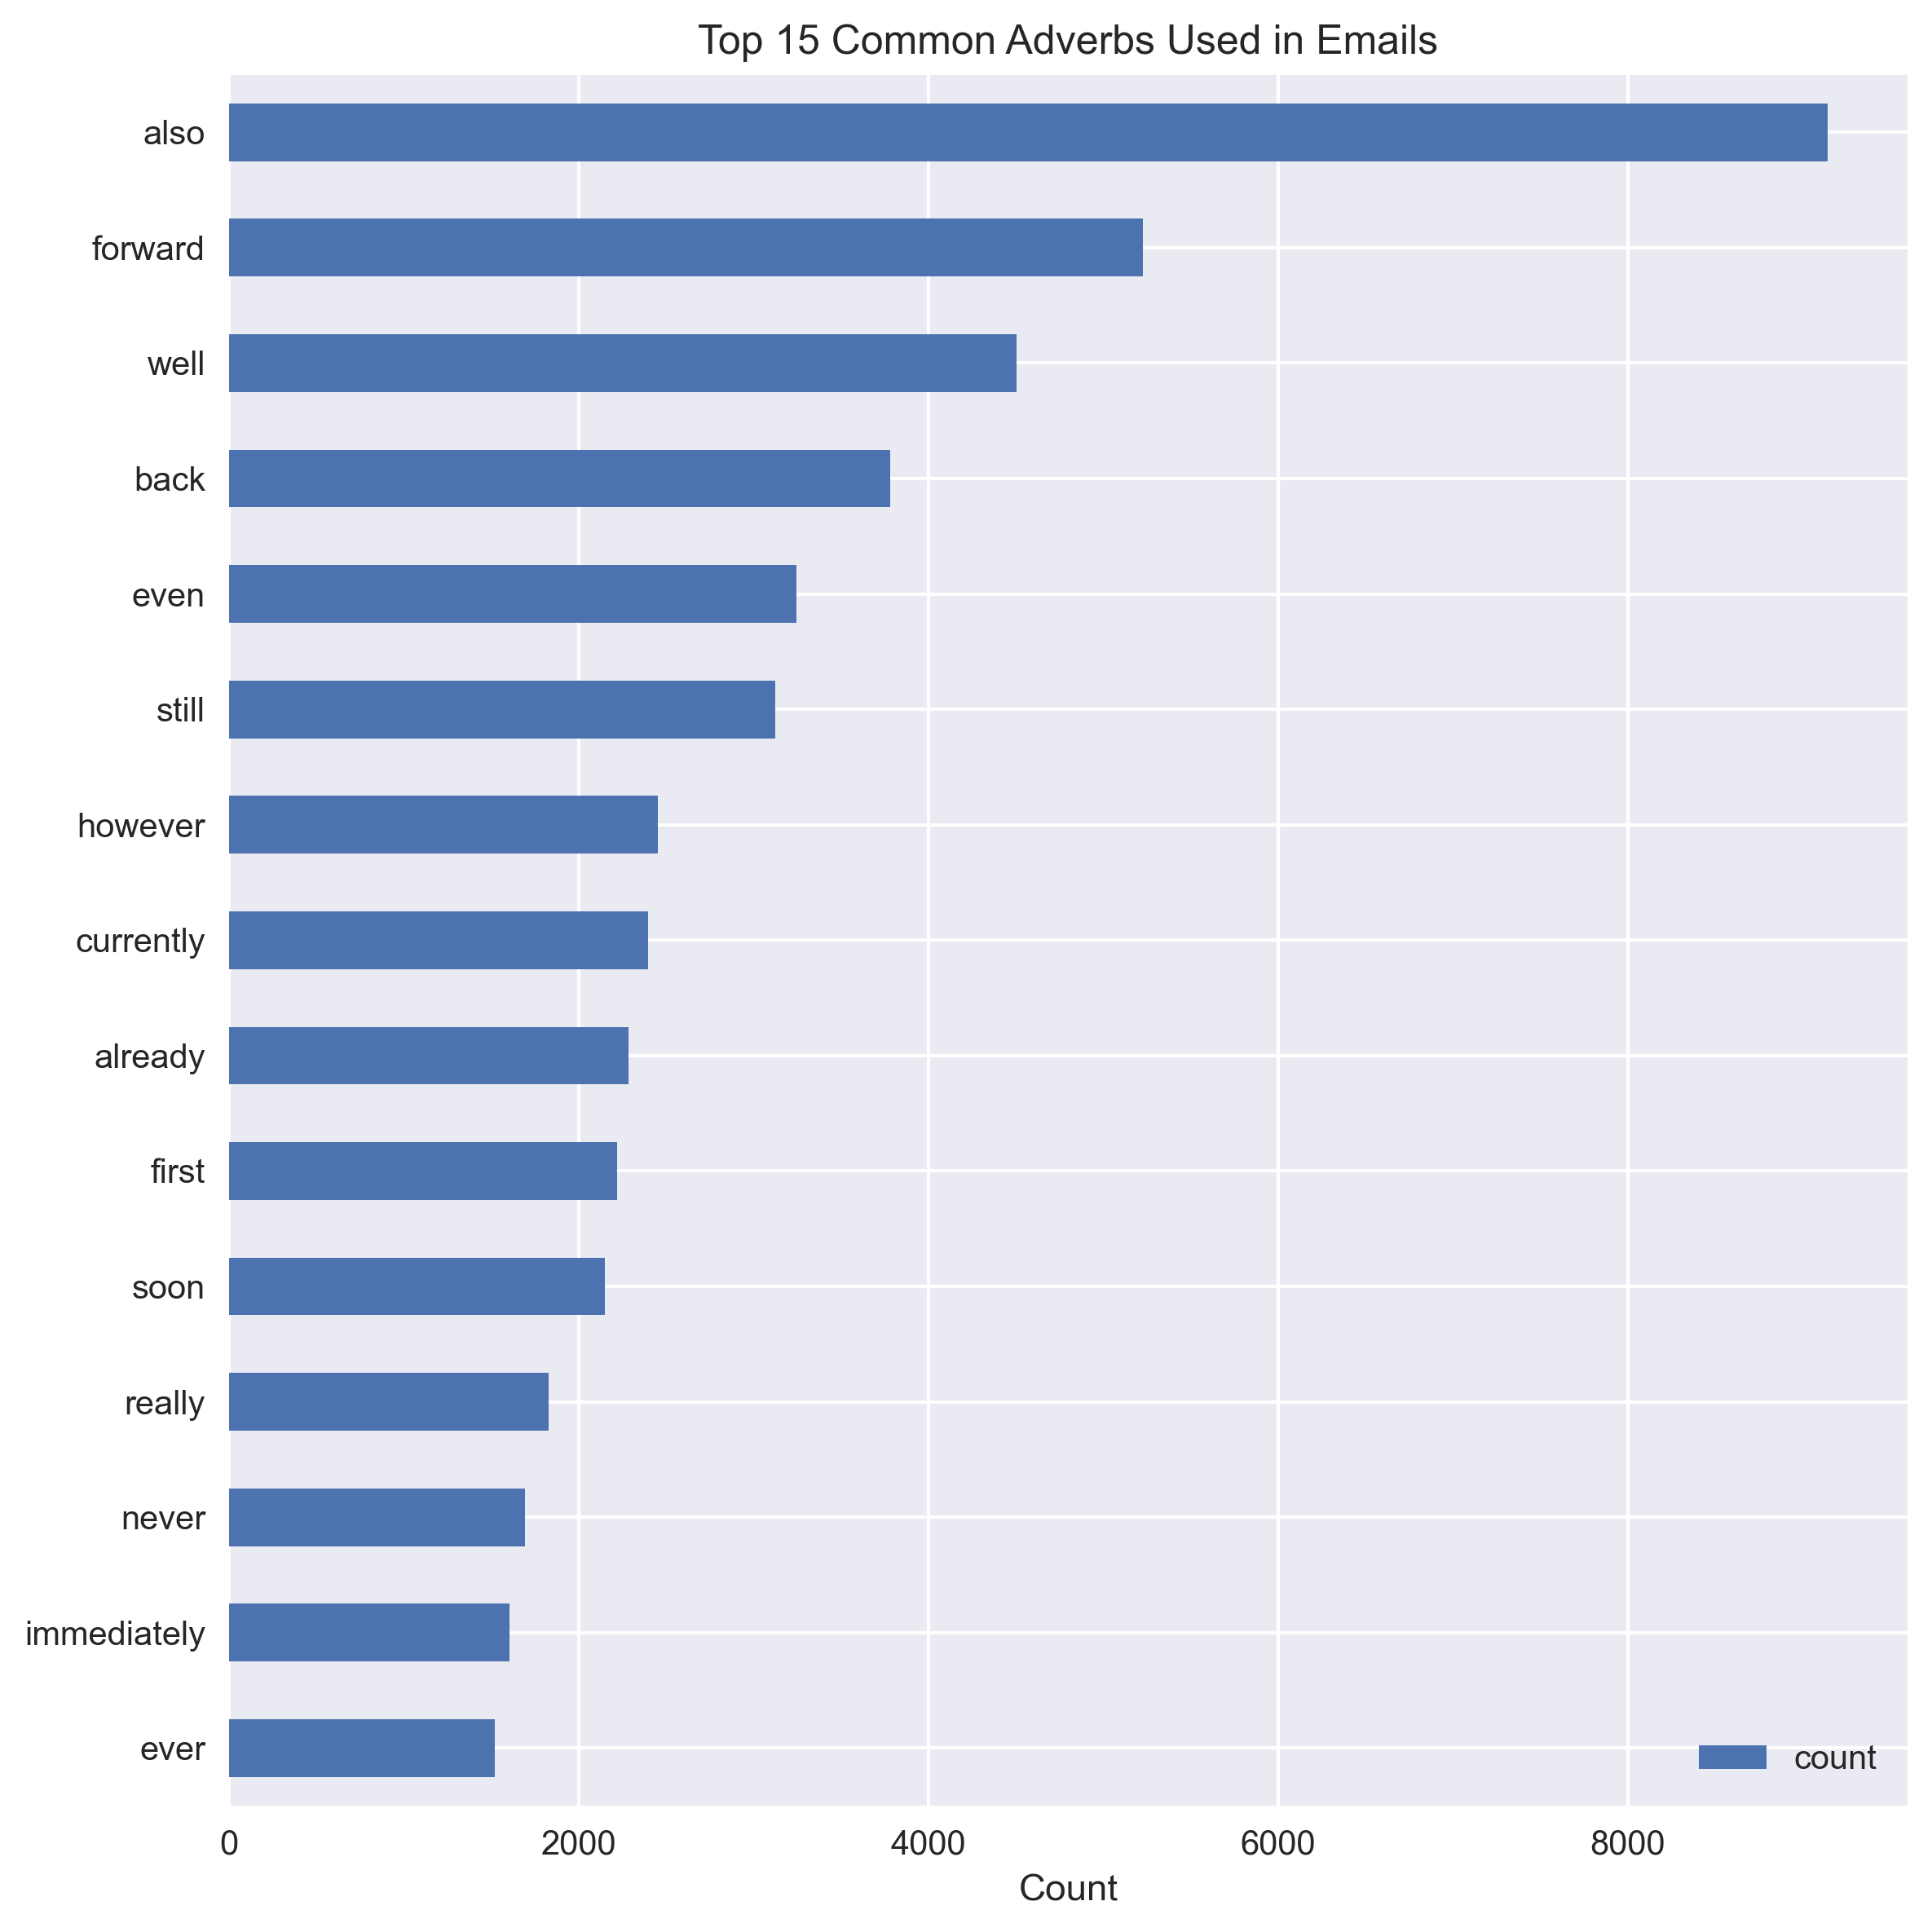

In [15]:
# Visualize top 15 most frequently used adverbs
fig, ax = plt.subplots(figsize=(8, 8), dpi=300, tight_layout=True)
clean_adv.sort_values(by='count').plot.barh(x='words', y='count', ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('')
ax.set_title("Top 15 Common Adverbs Used in Emails")
plt.show()
fig.savefig('../results/top_15_common_adverbs_used_in_emails.png', dpi=fig.dpi)

We also created word clouds for better data visualization. 

In [16]:
str_token = ' '.join(map(str, token_extract)) # Convert list token to string
wordcloud_type1 = WordCloud().generate(str_token)

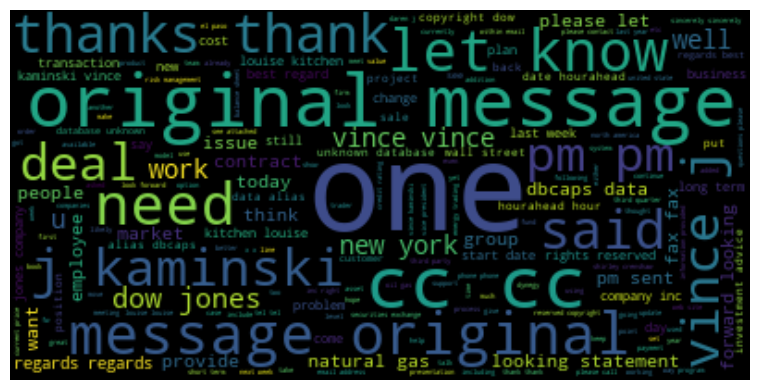

In [17]:
fig = plt.figure(figsize=(8, 4), dpi=100, tight_layout=True)
plt.imshow(wordcloud_type1, interpolation='bilinear')
plt.axis("off")
plt.show()
fig.savefig('../results/word_cloud_type1.png', dpi=fig.dpi)

In [18]:
wordcloud_type2 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str_token)

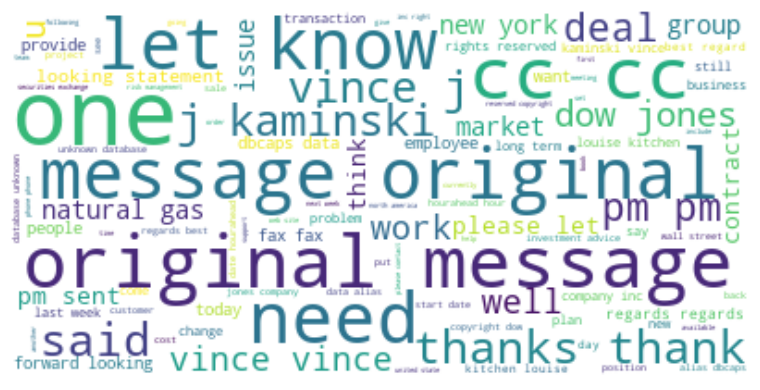

In [19]:
# Change background color and plot a new word cloud graph
fig = plt.figure(figsize=(8, 4), dpi=100, tight_layout=True)
plt.imshow(wordcloud_type2, interpolation="bilinear")
plt.axis("off")
plt.show()
fig.savefig('../results/word_cloud_type2.png', dpi=fig.dpi)

### Spam Ratio

In our dataset, 378,601 records are marked as **spam** (48.18\%) . 407,140 are not spam (51.81\%).

In [20]:
display(df['y'].value_counts())
display((df['y'].value_counts() / len(df['y'])) * 100)

0    407140
1    378508
Name: y, dtype: int64

0    51.82219
1    48.17781
Name: y, dtype: float64

### Vectorization

Before fitting data into models, we vectorized each word and its frequency.

In [21]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['X'])

In [22]:
display(X.shape)

(785648, 143084)

There are 143,176 unique words (features) in the dataset.

In [23]:
# Mapping from feature integer indices to feature name and display the first 15 results.
sample_feature_dict = dict(itertools.islice(vectorizer.vocabulary_.items(), 15))
display(sample_feature_dict)

{'aa': 0,
 'exec': 42240,
 'lead': 71012,
 'congrats': 24876,
 'houston': 57328,
 'office': 87932,
 'interestingly': 62332,
 'enough': 39605,
 'wes': 135941,
 'colwell': 23449,
 'partner': 92132,
 'indicated': 60788,
 'proposal': 99178,
 'regard': 104383,
 'transactions': 126259}

In [24]:
df_sample_features = pd.DataFrame.from_dict(sample_feature_dict, orient='index')

In [25]:
df_sample_features.to_csv('../results/sample_features.csv', index=False)